In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


##### Assumption in Multlinear Regression
1. **Linearity:** The relationship between the predictors(x)and the response (y) is linear.
2. **Independence:** Observations are independent of each other.
3. **Homoscedasticity:** The residuals(y-Y_hat)exhibit constant variance at all levels of the predicator.
4. **Normal Distrubution of Errors:** The residuals of the model are normally distributed.

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

### Observations about info(),missing values 
- There are no missing values
- There are 81 observations (81 diffrent cars data)
- The data types of the columns are also relevant and valid

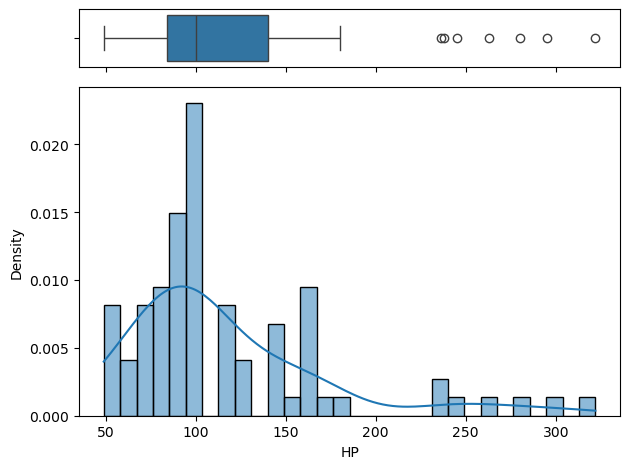

In [5]:
fig ,(ax_box,ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='HP',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='HP',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

### Observations from boxplot and histogram
- there are some extreame values (outlieres) observed in towards the right tail of SP and HP distributions.
- In VOL and WT columns,few outliers are observed in both tails of their distributions.
- The extreame values of cars data may have come from the specially designed nature of cars
- As this is multi-dimesional data,the otliers with respect to spatial dimensions may have to be considered while during the regression model

#### Checking for duplictated row

In [6]:
cars[cars.duplicated()]

,HP,MPG,VOL,SP,WT


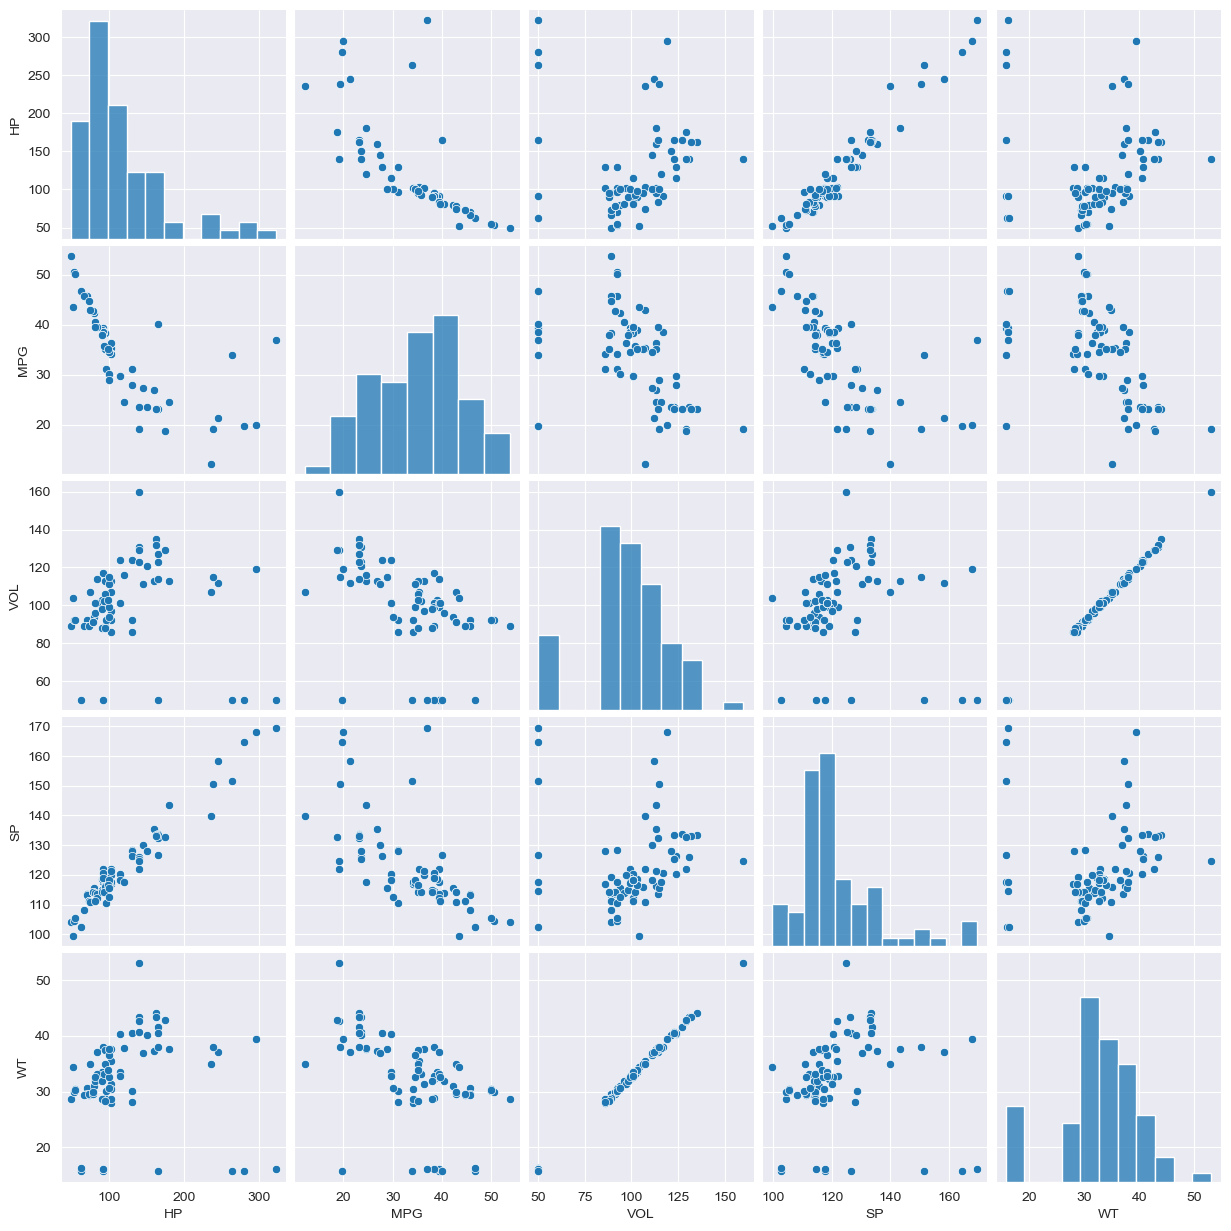

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

Observation from correlation plots and coefficients

.Between x and  y,all the  x variables are showing moderate to high corelation strengths, highest being between HP and MPG

In [8]:
model1= smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [9]:
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        09:35:29   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observations from model summary
> The R_squared and adjusted R_Squared values are good and about 75% of variablity in Y in explained by X columns
> The prob value with respect to F_ stastics is close to zero, indicating that all or some of X columns are significant
> The p-values for VOL and WT are hiher than 5% indicating some interaction issue among themselves ,which need to be further explored

In [13]:
pred_y1 = model1.predict(cars.iloc[:,0:4])
df1["pred_y1"] = pred_y1
df1.head()

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'WT' is not defined
    MPG~WT+VOL+SP+HP
        ^^

In [10]:
df1 = pd.DataFrame()
df1["actual_y1"] = cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
